In [1]:
import pandas as pd
from sklearn import tree
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(12, 6)})
%matplotlib inline


In [2]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import os
os.chdir('C://Users/79517/Accident')

Используем модуль geopy для нахождения точек долготы и широты

In [4]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Nikita909")

In [6]:
df1 = pd.read_excel('DTP_week1_june.xls')
df2 = pd.read_excel('DTP_week2_june.xls')
df3 = pd.read_excel('DTP_week3_june.xls')
df4 = pd.read_excel('DTP_week4_june.xls')
df5 = pd.read_excel('DTP_week5_june.xls')
df6 = pd.read_excel('DTP1.xls', skiprows=1)
df7 = pd.read_excel('DTP2.xls', skiprows=1)
df8 = pd.read_excel('DTP3.xls', skiprows=1)
df9 = pd.read_excel('DTP4.xls', skiprows=1)
df10 = pd.read_excel('DTP5.xls', skiprows=1)
df11 = pd.read_excel('DTP6.xls', skiprows=1)
df12 = pd.read_excel('DTP7.xls', skiprows=1)


In [16]:
df = pd.read_excel('DTP_march_to_july.xlsx')

Функции для определения долготы и широты по адресу

In [ ]:
def getgeo_longitude(address):
    if hasattr(geolocator.geocode(address),'longitude') and (geolocator.geocode(address).longitude is not None):
        return geolocator.geocode(address).longitude

def getgeo_latitude(address):
    if hasattr(geolocator.geocode(address),'latitude') and (geolocator.geocode(address).latitude is not None):
        return geolocator.geocode(address).latitude
    
vectorized_getgeo_latitude = np.vectorize(getgeo_latitude)
vectorized_getgeo_longitude = np.vectorize(getgeo_longitude)

Использем функцию к массиву

In [ ]:
df1['latitude'] = vectorized_getgeo_latitude(df1['Адрес'])
df1['longitude'] = vectorized_getgeo_longitude(df1['Адрес'])
df2['latitude'] = vectorized_getgeo_latitude(df2['Адрес'])
df2['longitude'] = vectorized_getgeo_longitude(df2['Адрес'])
df3['latitude'] = vectorized_getgeo_latitude(df3['Адрес'])
df3['longitude'] = vectorized_getgeo_longitude(df3['Адрес'])
df4['latitude'] = vectorized_getgeo_latitude(df4['Адрес'])
df4['longitude'] = vectorized_getgeo_longitude(df4['Адрес'])
df5['latitude'] = vectorized_getgeo_latitude(df5['Адрес'])
df5['longitude'] = vectorized_getgeo_longitude(df5['Адрес'])
df6['latitude'] = vectorized_getgeo_latitude(df6['Адрес'])
df6['longitude'] = vectorized_getgeo_longitude(df6['Адрес'])
df7['latitude'] = vectorized_getgeo_latitude(df7['Адрес'])
df7['longitude'] = vectorized_getgeo_longitude(df7['Адрес'])
df8['latitude'] = vectorized_getgeo_latitude(df8['Адрес'])
df8['longitude'] = vectorized_getgeo_longitude(df8['Адрес']) 
df9['latitude'] = vectorized_getgeo_latitude(df9['Адрес'])
df9['longitude'] = vectorized_getgeo_longitude(df9['Адрес'])
df10['latitude'] = vectorized_getgeo_latitude(df10['Адрес'])
df10['longitude'] = vectorized_getgeo_longitude(df10['Адрес'])
df11['latitude'] = vectorized_getgeo_latitude(df11['Адрес'])
df11['longitude'] = vectorized_getgeo_longitude(df11['Адрес'])
df12['latitude'] = vectorized_getgeo_latitude(df12['Адрес'])
df12['longitude'] = vectorized_getgeo_longitude(df12['Адрес'])
DTP_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]

In [17]:
df.head()

,Unnamed: 0,№ п/п,Дата ДТП,Район,Номер ДТП,Вид ДТП,Дорога,КМ,М,Адрес,Погибло,Ранено,Кол-во ТС,Кол-во участников,latitude,longitude
0,1,5,07.06.2020,Тракторозаводский район,750017174,Наезд на препятствие,NaN,0,0,г Челябинск ул Героев Танкограда 102,0,1,1,1,55.176449,61.448695
1,8,13,06.06.2020,Курчатовский район,750017582,Столкновение,NaN,0,0,г Челябинск ул Чичерина 22 5,0,1,3,3,55.171512,61.307476
2,11,16,06.06.2020,Ленинский(Ч) район,750017141,Наезд на пешехода,NaN,0,0,г Челябинск ул Гагарина 21,0,1,1,2,55.137048,61.440788
3,18,26,05.06.2020,Центральный район,750017038,Столкновение,NaN,0,0,г Челябинск ул Худякова 19,0,1,2,2,55.147348,61.372383
4,21,29,05.06.2020,Центральный район,750017061,Столкновение,NaN,0,0,г Челябинск ул Труда 157,0,2,2,3,55.167289,61.391755


Перезаписываем excel файл с новыми данными

In [ ]:
DTP_march_to_july.to_excel('DTP_march_to_july.xlsx')

Стоим скаттерплот, из которого видно, что можно провести кластеризацию

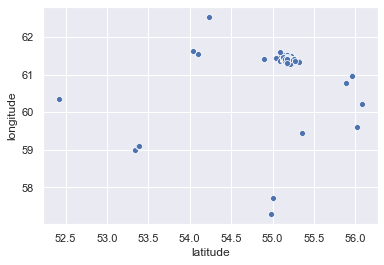

In [18]:
sns.scatterplot(x=df.latitude, y=df.longitude)

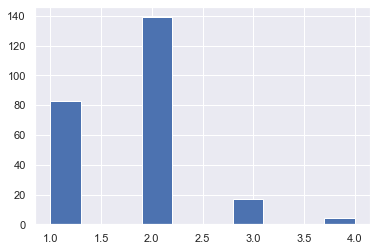

In [19]:
df['Кол-во ТС'].hist()

In [13]:
DTP_march_to_july = pd.concat(DTP_list)

In [17]:
DTP_city = pd.read_excel('DTP_march_to_july.xlsx')
DTP_city.head()

,Unnamed: 0,№ п/п,Дата ДТП,Район,Номер ДТП,Вид ДТП,Дорога,КМ,М,Адрес,Погибло,Ранено,Кол-во ТС,Кол-во участников,latitude,longitude
0,0,2,07.06.2020,ЗАТО город Снежинск,750017176,Съезд с дороги,NaN,0,0,г Снежинск,0,1,1,1,56.087009,60.732674
1,1,5,07.06.2020,Тракторозаводский район,750017174,Наезд на препятствие,NaN,0,0,г Челябинск ул Героев Танкограда 102,0,1,1,1,55.176449,61.448695
2,2,6,07.06.2020,Кыштымский городской округ,750017179,Наезд на велосипедиста,ДОЛГОДЕРЕВЕНСКОЕ-АРГАЯШ-КУЗНЕЦКОЕ-КЫШТЫМ,71,495,г Кыштым,0,1,2,2,55.709923,60.551208
3,3,7,07.06.2020,Златоустовский городской округ,750017206,Столкновение,NaN,0,0,г Златоуст пр-кт Мира 24,0,2,2,3,NaN,NaN
4,4,9,07.06.2020,Курчатовский район,750017184,Наезд на пешехода,NaN,0,0,г Челябинск,0,1,1,2,55.159841,61.402555


### Ниже представлен код, где пытаюсь сопоставить ДТП с погодными условиями

In [20]:
weather = pd.read_excel('wea.xls', skiprows=6)

In [21]:
wea = pd.read_excel('weather_june_2020.xls')

In [22]:
wea.head()

,Местное время в Челябинске,Day_of_week,temp_of_air,Po,P,Pa,wetness,direct_of_wind,velocity_of_wind,cloudiness,WW,W1,visibility_range,rainfall,time_rainfall
0,01.06.2020 02:00,Понедельник,11.7,732.1,752.8,1.0,70,"Ветер, дующий с севера",3,70 – 80%.,Состояние неба в общем не изменилось.,Гроза (грозы) с осадками или без них.,4,NaN,NaN
1,01.06.2020 05:00,Понедельник,10.4,733.3,754.2,1.2,74,"Ветер, дующий с северо-северо-запада",2,"90 или более, но не 100%",Состояние неба в общем не изменилось.,Гроза (грозы) с осадками или без них.,10,NaN,NaN
2,01.06.2020 08:00,Понедельник,13.3,733.6,754.3,0.3,66,"Ветер, дующий с запада",2,Облаков нет.,,NaN,10,0.0,12.0
3,01.06.2020 11:00,Понедельник,21.9,733.9,754.0,0.3,47,"Ветер, дующий с западо-северо-запада",3,60%.,,NaN,10,NaN,NaN
4,01.06.2020 14:00,Понедельник,24.0,734.0,753.9,0.1,36,"Ветер, дующий с западо-северо-запада",4,60%.,,NaN,10,NaN,NaN


In [23]:
weather = weather.rename(columns={'Местное время в Челябинске':'date','T':'temp_of_air', 'U':'wetness', 'DD':'direct_of_wind', 'RRR':'rainfall',
                                  'VV':'visibility_range', 'ff3':'velocity_of_wind'})

date                   0
temp_of_air            0
Po                     0
P                      1
Pa                     1
wetness                2
direct_of_wind         0
Ff                     0
ff10                1048
velocity_of_wind     945
N                      1
WW                     0
W1                   902
W2                   902
Tn                   943
Tx                   944
Cl                   291
Nh                   291
H                    287
Cm                   458
Ch                   500
visibility_range       1
Td                     2
rainfall            1033
tR                   810
E                    962
Tg                   962
E'                  1064
sss                 1064
dtype: int64

In [25]:
weather = weather.drop(['Ff', 'ff10', 'Ch', 'Nh', 'Tx', 'WW', 'Cl', 'Tn', 'H', 'E', "E'",
                        'N', 'Td', 'W1', 'W2', 'Cm', 'tR', 'Tg', 'sss'], axis=1)
weather.isnull().sum()

date                   0
temp_of_air            0
Po                     0
P                      1
Pa                     1
wetness                2
direct_of_wind         0
velocity_of_wind     945
visibility_range       1
rainfall            1033
dtype: int64

In [26]:
DTP_march_to_july = pd.concat(DTP_list)

In [54]:
DTP_march_to_july['latitude'] = vectorized_getgeo_latitude(DTP_march_to_july['Адрес'])
DTP_march_to_july['longitude'] = vectorized_getgeo_longitude(DTP_march_to_july['Адрес'])


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=%D0%B4+%D0%91%D1%83%D1%82%D0%B0%D0%BA%D0%B8+%D1%83%D0%BB+%D0%9B%D1%83%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F+14&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [ ]:
DTP_march_to_july.head()

In [ ]:
DTP_all = DTP_march_to_july.groupby('Дата ДТП', as_index=False).agg({'№ п/п':'count'}) \
.rename(columns={'Дата ДТП':'date', '№ п/п':'number_accident'})

In [ ]:
DTP_all['day'] = pd.to_datetime(DTP_all['date']).dt.date
DTP_all

In [ ]:
DTP_all.isnull().sum()

In [ ]:
weather['day'] = pd.to_datetime(weather['date']).dt.date


In [ ]:
weather = weather.fillna(0)

In [ ]:
weather.head()

In [ ]:
weather_mean = weather.groupby(['day'], as_index=False).agg({'temp_of_air':'mean', 'visibility_range':'mean',
                                  'rainfall':'mean', 'velocity_of_wind':'mean', 'wetness':'mean'})

In [ ]:
weather_mean.head()

In [ ]:
weather_mean.isnull().sum()

In [ ]:
DTP_with_weather = weather_mean.merge(DTP_all, on='day', how='outer')

In [ ]:
DTP_with_weather['day'] = pd.to_datetime(DTP_with_weather['day'])
DTP_with_weather['day_of_week'] = DTP_with_weather['day'].dt.dayofweek
days = {0:'Mon', 1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
DTP_with_weather['day_of_week'] = DTP_with_weather['day_of_week'].apply(lambda x: days[x])

In [ ]:
DTP_with_weather = DTP_with_weather.fillna(0)

In [ ]:
DTP_with_weather.head()

In [ ]:
DTP_with_weather.isnull().sum()

In [ ]:
def show_regplot(data, x, y):
    """Ouput graph of regression between the parameters of
    telemetry and failure components
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.regplot(x = x, y = y, data = data)
    
    lr = LinearRegression().fit(data[x].values.reshape(-1, 1), data[y].values.reshape(-1, 1))
    y_prediction = lr.predict(data[y].values.reshape(-1, 1))
    
    mse = mean_squared_error(data[y], y_prediction)
    mae = mean_absolute_error(data[y], y_prediction)
    R, p = scipy.stats.spearmanr(data[x], data[y])
    print('R = {0}, p = {1}, n = {2}'.format(round(R, 5), round(p, 5), data[x].shape[0]))
    print("[{3}] = {0} {2} {1} • [{4}]".format(lr.intercept_, lr.coef_[0], "-" if lr.coef_[0]<0 else "+", y, x))
    print("MSE = {0}, MAE = {1}".format(round(mse, 5), round(mae, 5)))
    
    plt.show()

In [ ]:
DTP_with_weather.isnull().sum()

In [ ]:
show_regplot(DTP_with_weather, 'temp_of_air', 'number_accident')

In [ ]:
show_regplot(DTP_with_weather, 'wetness', 'number_accident')

In [ ]:
show_regplot(DTP_with_weather, 'velocity_of_wind', 'number_accident')

In [ ]:
show_regplot(DTP_with_weather, 'rainfall', 'number_accident')

In [ ]:
DTP_group_day = DTP_with_weather.groupby(['day_of_week'], as_index=False).agg({'number_accident':'count',
                                                                               'visibility_range':'mean',
                                  'rainfall':'mean', 'velocity_of_wind':'mean', 'wetness':'mean'})

In [ ]:
DTP_group_day.head()

In [ ]:
sns.pairplot(DTP_group_day)

In [ ]:
sns.pairplot(DTP_with_weather, hue='day_of_week')

In [ ]:
DTP_tree = DTP_with_weather.drop(['number_accident', 'day', 'date'], axis=1)
y = DTP_with_weather[['number_accident']]

In [ ]:
y = y.fillna(0)

In [ ]:
DTP_tree = pd.get_dummies(DTP_tree)

In [ ]:
DTP_tree.isnull().sum()

In [ ]:
DTP_tree.head()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
DTP_tree_train, DTP_tree_test, y_train, y_test = train_test_split(DTP_tree, y, test_size=0.33, random_state = 42)

In [ ]:
scores_data = pd.DataFrame()

In [ ]:
max_depth_values = range(1, 20)
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(DTP_tree_train, y_train)
    train_score = clf.score(DTP_tree_train, y_train)
    test_score = clf.score(DTP_tree_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 'train_score':[train_score], 'test_score':[test_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [ ]:
scores_data.head()

In [ ]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='scores')

In [ ]:
sns.lineplot(data=scores_data_long, x='max_depth', y='scores', hue='set_type')

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(DTP_march_to_july['Адрес'])

In [ ]:
DTP_march_to_july['code_place'] = le.transform(DTP_march_to_july['Адрес'])

In [ ]:
DTP_march_to_july

In [ ]:
DTP_march_to_july.groupby('code_place').agg({'Кол-во участников':'mean'})

In [ ]:
conda install python=3 geopandas